<a href="https://colab.research.google.com/github/hemil19/Credit-Card-Payment-Default-Prediction/blob/master/CreditCardDefault.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
train=pd.read_csv('/content/train_credit.csv')
test=pd.read_csv('/content/test_credit.csv')

In [3]:
combine=train.append(test)
combine.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,25150,360000,2,2,2,25,-1,-1,-1,-1,-1,-1,20952,12590,3479,3435,8870,2020,12590,3479,3446,8870,2020,27043,0.0
1,13470,240000,2,1,2,46,2,2,-2,-1,0,-1,456,0,0,2240,1681,2267,0,0,2240,0,2267,3074,0.0
2,3092,320000,2,2,1,41,0,0,0,0,0,0,49846,53811,38717,35409,35036,35939,5000,2000,2000,3000,3000,1500,0.0
3,13973,50000,2,2,2,24,-1,-1,-2,-2,-2,-2,2675,0,0,0,0,0,0,0,0,0,0,0,1.0
4,10567,80000,1,3,1,52,-1,0,0,0,0,0,35861,18521,19385,20561,21261,21457,1500,1500,1500,1028,876,1449,0.0


In [4]:
combine.shape

(30000, 25)

In [5]:
combine['payment_delay']=combine['PAY_0']+combine['PAY_2']+combine['PAY_3']+combine['PAY_4']+combine['PAY_5']+combine['PAY_6']
combine.drop(['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'],axis=1,inplace=True)
combine.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,payment_delay
0,25150,360000,2,2,2,25,20952,12590,3479,3435,8870,2020,12590,3479,3446,8870,2020,27043,0.0,-6
1,13470,240000,2,1,2,46,456,0,0,2240,1681,2267,0,0,2240,0,2267,3074,0.0,0
2,3092,320000,2,2,1,41,49846,53811,38717,35409,35036,35939,5000,2000,2000,3000,3000,1500,0.0,0
3,13973,50000,2,2,2,24,2675,0,0,0,0,0,0,0,0,0,0,0,1.0,-10
4,10567,80000,1,3,1,52,35861,18521,19385,20561,21261,21457,1500,1500,1500,1028,876,1449,0.0,-1


In [6]:
combine['total_bill_amount']=combine['BILL_AMT1']+combine['BILL_AMT2']+combine['BILL_AMT3']+combine['BILL_AMT4']+combine['BILL_AMT5']+combine['BILL_AMT6']
combine.drop(['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'],axis=1,inplace=True)
combine.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,payment_delay,total_bill_amount
0,25150,360000,2,2,2,25,12590,3479,3446,8870,2020,27043,0.0,-6,51346
1,13470,240000,2,1,2,46,0,0,2240,0,2267,3074,0.0,0,6644
2,3092,320000,2,2,1,41,5000,2000,2000,3000,3000,1500,0.0,0,248758
3,13973,50000,2,2,2,24,0,0,0,0,0,0,1.0,-10,2675
4,10567,80000,1,3,1,52,1500,1500,1500,1028,876,1449,0.0,-1,137046


In [7]:
combine['total_bill_payed']=combine['PAY_AMT1']+combine['PAY_AMT2']+combine['PAY_AMT3']+combine['PAY_AMT4']+combine['PAY_AMT5']+combine['PAY_AMT6']
combine.drop(['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'],axis=1,inplace=True)
combine.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,default_payment_next_month,payment_delay,total_bill_amount,total_bill_payed
0,25150,360000,2,2,2,25,0.0,-6,51346,57448
1,13470,240000,2,1,2,46,0.0,0,6644,7581
2,3092,320000,2,2,1,41,0.0,0,248758,16500
3,13973,50000,2,2,2,24,1.0,-10,2675,0
4,10567,80000,1,3,1,52,0.0,-1,137046,7853


In [8]:
combine['amount_left']=combine['LIMIT_BAL']-combine['total_bill_amount']
combine.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,default_payment_next_month,payment_delay,total_bill_amount,total_bill_payed,amount_left
0,25150,360000,2,2,2,25,0.0,-6,51346,57448,308654
1,13470,240000,2,1,2,46,0.0,0,6644,7581,233356
2,3092,320000,2,2,1,41,0.0,0,248758,16500,71242
3,13973,50000,2,2,2,24,1.0,-10,2675,0,47325
4,10567,80000,1,3,1,52,0.0,-1,137046,7853,-57046


In [9]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
combine['amount_left']=sc.fit_transform(np.array(combine['amount_left']).reshape(-1,1))
combine['total_bill_payed']=sc.fit_transform(np.array(combine['total_bill_payed']).reshape(-1,1))
combine['total_bill_amount']=sc.fit_transform(np.array(combine['total_bill_amount']).reshape(-1,1))
combine['LIMIT_BAL']=sc.fit_transform(np.array(combine['LIMIT_BAL']).reshape(-1,1))

In [10]:
combine['EDUCATION']=combine['EDUCATION'].replace(6,5).value_counts()

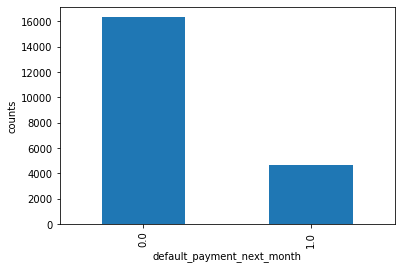

In [11]:
#this seems to be class imbalanced problem
import matplotlib.pyplot as plt
%matplotlib inline
combine['default_payment_next_month'].value_counts().plot(kind='bar')
plt.xlabel('default_payment_next_month')
plt.ylabel('counts')
plt.show()

In [12]:
combine.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,default_payment_next_month,payment_delay,total_bill_amount,total_bill_payed,amount_left
0,25150,1.483795,2,14.0,2,25,0.0,-6,-0.575711,0.424100,1.134990
1,13470,0.558907,2,10585.0,2,46,0.0,0,-0.693485,-0.395721,0.927068
2,3092,1.175499,2,14030.0,1,41,0.0,0,-0.055601,-0.249091,0.479419
3,13973,-0.905498,2,4917.0,2,24,1.0,-10,-0.703942,-0.520354,0.413376
4,10567,-0.674276,1,123.0,1,52,0.0,-1,-0.349922,-0.391249,0.125174


In [13]:
X = combine[combine['default_payment_next_month'].isnull()!=True].drop(['ID','default_payment_next_month'], axis=1)
y = combine[combine['default_payment_next_month'].isnull()!=True]['default_payment_next_month']

test = combine[combine['default_payment_next_month'].isnull()==True].drop(['ID','default_payment_next_month'], axis=1)

X.shape, y.shape, test.shape

((21000, 9), (21000,), (9000, 9))

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

In [16]:
model = LGBMClassifier(max_depth=5,
                       learning_rate=0.4, n_estimators=100)

model.fit(X_train,y_train,
          eval_set=[(X_train,y_train),(X_test, y_test.values)],
          eval_metric='auc',
          early_stopping_rounds=100,
          verbose=200)

pred_y = model.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test, pred_y))
confusion_matrix(y_test, pred_y>0.5)

Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[100]	training's binary_logloss: 0.328556	training's auc: 0.899589	valid_1's binary_logloss: 0.474808	valid_1's auc: 0.751223
0.751222743003735


array([[3031,  214],
       [ 652,  303]])

In [17]:
import plotly.express as px
fpr, tpr, thresholds = roc_curve(y_test, pred_y)
fig = px.line(x=fpr, y=tpr, width=400, height=400,
              labels={'x':'False Positive Rates','y':'True Positive Rates'})
fig.show()

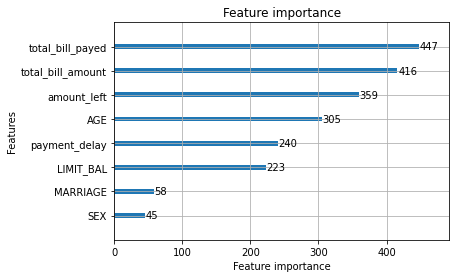

In [18]:
import lightgbm
lightgbm.plot_importance(model)

Cross-Validating train set as dataset is highly imbalanced

In [19]:
X.shape,y.shape

((21000, 9), (21000,))

In [20]:
err = []
y_pred_tot_lgm = []

from sklearn.model_selection import StratifiedKFold

fold = StratifiedKFold(n_splits=15)
i = 1
for train_index, test_index in fold.split(X, y):
    x_train, x_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y[train_index], y[test_index]
    m = LGBMClassifier(boosting_type='gbdt',
                       max_depth=5,
                       learning_rate=0.05,
                       n_estimators=5000,
                       min_child_weight=0.01,
                       colsample_bytree=0.5,
                       random_state=1994)
    m.fit(x_train, y_train,
          eval_set=[(x_train,y_train),(x_val, y_val)],
          early_stopping_rounds=200,
          eval_metric='auc',
          verbose=200)
    pred_y = m.predict_proba(x_val)[:,1]
    print("err_lgm: ",roc_auc_score(y_val,pred_y))
    fpr, tpr, thresholds = roc_curve(y_val, pred_y)
    fig = px.line(x=fpr, y=tpr, width=400, height=400,
              labels={'x':'False Positive Rates','y':'True Positive Rates'})
    fig.show()
    err.append(roc_auc_score(y_val, pred_y))
    pred_test = m.predict_proba(test)[:,1]
    i = i + 1
    y_pred_tot_lgm.append(pred_test)

Training until validation scores don't improve for 200 rounds.
[200]	training's binary_logloss: 0.41008	training's auc: 0.813427	valid_1's binary_logloss: 0.433686	valid_1's auc: 0.776689
Early stopping, best iteration is:
[20]	training's binary_logloss: 0.459695	training's auc: 0.781226	valid_1's binary_logloss: 0.458928	valid_1's auc: 0.777424
err_lgm:  0.7774242923122103


Training until validation scores don't improve for 200 rounds.
[200]	training's binary_logloss: 0.410569	training's auc: 0.813472	valid_1's binary_logloss: 0.429659	valid_1's auc: 0.785048
Early stopping, best iteration is:
[40]	training's binary_logloss: 0.439228	training's auc: 0.785873	valid_1's binary_logloss: 0.436339	valid_1's auc: 0.789073
err_lgm:  0.7890729979621438


Training until validation scores don't improve for 200 rounds.
[200]	training's binary_logloss: 0.409472	training's auc: 0.815061	valid_1's binary_logloss: 0.450474	valid_1's auc: 0.747146
Early stopping, best iteration is:
[195]	training's binary_logloss: 0.409958	training's auc: 0.814396	valid_1's binary_logloss: 0.450228	valid_1's auc: 0.747416
err_lgm:  0.7474156010192248


Training until validation scores don't improve for 200 rounds.
[200]	training's binary_logloss: 0.408111	training's auc: 0.816356	valid_1's binary_logloss: 0.4586	valid_1's auc: 0.745385
Early stopping, best iteration is:
[158]	training's binary_logloss: 0.412508	training's auc: 0.810305	valid_1's binary_logloss: 0.458234	valid_1's auc: 0.746757
err_lgm:  0.7467570798442094


Training until validation scores don't improve for 200 rounds.
[200]	training's binary_logloss: 0.409844	training's auc: 0.813588	valid_1's binary_logloss: 0.44818	valid_1's auc: 0.765654
Early stopping, best iteration is:
[50]	training's binary_logloss: 0.432959	training's auc: 0.789637	valid_1's binary_logloss: 0.447021	valid_1's auc: 0.769349
err_lgm:  0.7693485089834747


Training until validation scores don't improve for 200 rounds.
[200]	training's binary_logloss: 0.409319	training's auc: 0.814506	valid_1's binary_logloss: 0.445808	valid_1's auc: 0.760286
Early stopping, best iteration is:
[90]	training's binary_logloss: 0.421945	training's auc: 0.79827	valid_1's binary_logloss: 0.445036	valid_1's auc: 0.7622
err_lgm:  0.7622003551346552


Training until validation scores don't improve for 200 rounds.
[200]	training's binary_logloss: 0.409309	training's auc: 0.814509	valid_1's binary_logloss: 0.444419	valid_1's auc: 0.765814
Early stopping, best iteration is:
[62]	training's binary_logloss: 0.428261	training's auc: 0.793283	valid_1's binary_logloss: 0.444618	valid_1's auc: 0.767271
err_lgm:  0.7672713820656999


Training until validation scores don't improve for 200 rounds.
[200]	training's binary_logloss: 0.408409	training's auc: 0.815436	valid_1's binary_logloss: 0.462963	valid_1's auc: 0.740539
Early stopping, best iteration is:
[72]	training's binary_logloss: 0.424609	training's auc: 0.796606	valid_1's binary_logloss: 0.458759	valid_1's auc: 0.741697
err_lgm:  0.7416972477064221


Training until validation scores don't improve for 200 rounds.
[200]	training's binary_logloss: 0.410239	training's auc: 0.814136	valid_1's binary_logloss: 0.436354	valid_1's auc: 0.773679
Early stopping, best iteration is:
[68]	training's binary_logloss: 0.427499	training's auc: 0.79385	valid_1's binary_logloss: 0.436562	valid_1's auc: 0.775364
err_lgm:  0.775364013021604


Training until validation scores don't improve for 200 rounds.
[200]	training's binary_logloss: 0.408883	training's auc: 0.814153	valid_1's binary_logloss: 0.452698	valid_1's auc: 0.76183
Early stopping, best iteration is:
[70]	training's binary_logloss: 0.425957	training's auc: 0.794664	valid_1's binary_logloss: 0.45008	valid_1's auc: 0.763306
err_lgm:  0.7633057117490382


Training until validation scores don't improve for 200 rounds.
[200]	training's binary_logloss: 0.410078	training's auc: 0.813659	valid_1's binary_logloss: 0.438041	valid_1's auc: 0.773809
Early stopping, best iteration is:
[12]	training's binary_logloss: 0.47663	training's auc: 0.778423	valid_1's binary_logloss: 0.47781	valid_1's auc: 0.778609
err_lgm:  0.7786090559337082


Training until validation scores don't improve for 200 rounds.
[200]	training's binary_logloss: 0.410029	training's auc: 0.813822	valid_1's binary_logloss: 0.44422	valid_1's auc: 0.755099
Early stopping, best iteration is:
[39]	training's binary_logloss: 0.438942	training's auc: 0.788006	valid_1's binary_logloss: 0.449453	valid_1's auc: 0.759627
err_lgm:  0.7596271086120154


Training until validation scores don't improve for 200 rounds.
[200]	training's binary_logloss: 0.410771	training's auc: 0.812539	valid_1's binary_logloss: 0.430108	valid_1's auc: 0.786086
Early stopping, best iteration is:
[20]	training's binary_logloss: 0.459696	training's auc: 0.78035	valid_1's binary_logloss: 0.458174	valid_1's auc: 0.791168
err_lgm:  0.7911675051790471


Training until validation scores don't improve for 200 rounds.
[200]	training's binary_logloss: 0.40921	training's auc: 0.814522	valid_1's binary_logloss: 0.445197	valid_1's auc: 0.770917
Early stopping, best iteration is:
[122]	training's binary_logloss: 0.41799	training's auc: 0.802869	valid_1's binary_logloss: 0.443072	valid_1's auc: 0.773545
err_lgm:  0.7735454276413141


Training until validation scores don't improve for 200 rounds.
[200]	training's binary_logloss: 0.411462	training's auc: 0.812211	valid_1's binary_logloss: 0.419006	valid_1's auc: 0.799376
Early stopping, best iteration is:
[190]	training's binary_logloss: 0.412204	training's auc: 0.811149	valid_1's binary_logloss: 0.419035	valid_1's auc: 0.799589
err_lgm:  0.799588635691033


In [21]:
err

[0.7774242923122103,
 0.7890729979621438,
 0.7474156010192248,
 0.7467570798442094,
 0.7693485089834747,
 0.7622003551346552,
 0.7672713820656999,
 0.7416972477064221,
 0.775364013021604,
 0.7633057117490382,
 0.7786090559337082,
 0.7596271086120154,
 0.7911675051790471,
 0.7735454276413141,
 0.799588635691033]

In [22]:
np.mean(err,0)

0.7694929948570534

In [23]:
from xgboost import XGBClassifier

errxgb = []
y_pred_tot_xgb = []

from sklearn.model_selection import KFold,StratifiedKFold

fold = StratifiedKFold(n_splits=15)
i = 1
for train_index, test_index in fold.split(X,y):
    x_train, x_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y[train_index], y[test_index]
    m = XGBClassifier(boosting_type='gbdt',
                      max_depth=5,
                      learning_rate=0.07,
                      n_estimators=5000,
                      random_state=1994)
    m.fit(x_train, y_train,
          eval_set=[(x_train,y_train),(x_val, y_val)],
          early_stopping_rounds=200,
          eval_metric='auc',
          verbose=200)
    pred_y = m.predict_proba(x_val)[:,-1]
    print("err_xgb: ",roc_auc_score(y_val,pred_y))
    fpr, tpr, thresholds = roc_curve(y_val, pred_y)
    fig = px.line(x=fpr, y=tpr, width=400, height=400,
              labels={'x':'False Positive Rates','y':'True Positive Rates'})
    fig.show()
    errxgb.append(roc_auc_score(y_val, pred_y))
    pred_test = m.predict_proba(test)[:,-1]
    i = i + 1
    y_pred_tot_xgb.append(pred_test)

[0]	validation_0-auc:0.768579	validation_1-auc:0.763662
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[200]	validation_0-auc:0.835966	validation_1-auc:0.773163
Stopping. Best iteration:
[92]	validation_0-auc:0.811526	validation_1-auc:0.776011

err_xgb:  0.7760108448352065


[0]	validation_0-auc:0.763025	validation_1-auc:0.775984
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[200]	validation_0-auc:0.834659	validation_1-auc:0.781451
Stopping. Best iteration:
[28]	validation_0-auc:0.787032	validation_1-auc:0.785052

err_xgb:  0.7850521625894714


[0]	validation_0-auc:0.770619	validation_1-auc:0.731037
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[200]	validation_0-auc:0.836755	validation_1-auc:0.744555
Stopping. Best iteration:
[108]	validation_0-auc:0.816965	validation_1-auc:0.746392

err_xgb:  0.7463922235175116


[0]	validation_0-auc:0.76685	validation_1-auc:0.734506
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[200]	validation_0-auc:0.836268	validation_1-auc:0.755666
[400]	validation_0-auc:0.868292	validation_1-auc:0.752171
Stopping. Best iteration:
[200]	validation_0-auc:0.836268	validation_1-auc:0.755666

err_xgb:  0.7556663967323112


[0]	validation_0-auc:0.771888	validation_1-auc:0.755861
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[200]	validation_0-auc:0.835045	validation_1-auc:0.764763
Stopping. Best iteration:
[127]	validation_0-auc:0.821172	validation_1-auc:0.764948

err_xgb:  0.7649479857261086


[0]	validation_0-auc:0.770578	validation_1-auc:0.741446
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[200]	validation_0-auc:0.833534	validation_1-auc:0.760817
Stopping. Best iteration:
[81]	validation_0-auc:0.807876	validation_1-auc:0.763767

err_xgb:  0.7637673868008287


[0]	validation_0-auc:0.769506	validation_1-auc:0.759564
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[200]	validation_0-auc:0.836769	validation_1-auc:0.769848
Stopping. Best iteration:
[77]	validation_0-auc:0.806396	validation_1-auc:0.773695

err_xgb:  0.7736948801420539


[0]	validation_0-auc:0.770939	validation_1-auc:0.732825
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[200]	validation_0-auc:0.835026	validation_1-auc:0.736819
Stopping. Best iteration:
[75]	validation_0-auc:0.808902	validation_1-auc:0.742736

err_xgb:  0.7427360165729505


[0]	validation_0-auc:0.770623	validation_1-auc:0.761863
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[200]	validation_0-auc:0.833699	validation_1-auc:0.770102
Stopping. Best iteration:
[81]	validation_0-auc:0.807858	validation_1-auc:0.775269

err_xgb:  0.7752693104468777


[0]	validation_0-auc:0.765492	validation_1-auc:0.753415
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[200]	validation_0-auc:0.836255	validation_1-auc:0.768173
Stopping. Best iteration:
[112]	validation_0-auc:0.817852	validation_1-auc:0.770361

err_xgb:  0.7703610535661438


[0]	validation_0-auc:0.767035	validation_1-auc:0.765024
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[200]	validation_0-auc:0.836264	validation_1-auc:0.778864
Stopping. Best iteration:
[105]	validation_0-auc:0.814672	validation_1-auc:0.781716

err_xgb:  0.7817164841669133


[0]	validation_0-auc:0.769105	validation_1-auc:0.747672
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[200]	validation_0-auc:0.836717	validation_1-auc:0.754716
Stopping. Best iteration:
[38]	validation_0-auc:0.79229	validation_1-auc:0.765167

err_xgb:  0.765167209233501


[0]	validation_0-auc:0.76337	validation_1-auc:0.773744
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[200]	validation_0-auc:0.837183	validation_1-auc:0.792813
Stopping. Best iteration:
[151]	validation_0-auc:0.825261	validation_1-auc:0.795941

err_xgb:  0.7959411068363421


[0]	validation_0-auc:0.769206	validation_1-auc:0.768093
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[200]	validation_0-auc:0.835955	validation_1-auc:0.770718
Stopping. Best iteration:
[57]	validation_0-auc:0.801484	validation_1-auc:0.775215

err_xgb:  0.7752145605208642


[0]	validation_0-auc:0.76313	validation_1-auc:0.774639
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[200]	validation_0-auc:0.833522	validation_1-auc:0.796666
Stopping. Best iteration:
[33]	validation_0-auc:0.788194	validation_1-auc:0.798026

err_xgb:  0.7980260432080497


In [24]:
np.mean(errxgb,0)

0.771330910993009

In [25]:
submission=pd.read_csv('sample_submission.csv')
submission.head()

,ID,default_payment_next_month
0,10178,0
1,5304,0
2,5187,0
3,14495,0
4,20444,0


In [26]:
submission['default_payment_next_month']=(np.mean(y_pred_tot_lgm,0)+np.mean(y_pred_tot_xgb,0))/2

In [27]:
submission.head()

,ID,default_payment_next_month
0,10178,0.152786
1,5304,0.206418
2,5187,0.129504
3,14495,0.113614
4,20444,0.114341


In [28]:
submission.to_csv('stacking.csv',index=False)